<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/Stochastic_Gradient_Descent_Predicting_Sea_level_rise_jgkorman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLPP22 // Assignment 2**

assigned : **Feb 22, 2022**

DUE : **Mar 1, 2022 11:59pm**

## **Sea level rise: projections for the future**

<img src="https://cdn.viewing.nyc/assets/media/5c0dcd07e43c85f0ad421ed09f21df33/elements/08ebcd75071c8e4d673147698fbbdcdd/xl/cce6b621-11a3-4f0d-8a53-fccdb6457875_2x.png" width=500>

---

### OVERVIEW

Sea level has been on the rise for at least 100 years, and as the climate changes and the Earth warms, the rate of that rise has been an active area of study given the potential consequences if sea level is strongly affected.

Measurements of sea level mostly come in two flavors, satellites and tide gauges.  The satellite measurements are primarily accomplished by firing radio waves towards the ocean surface and waiting for the time it takes for those radio waves to bounce back and return to the satellite.  Since we know how fast light (radio waves are a form of light) travels, the distance from the satellite to the surface is just the bounce back time divided by the speed of light.  [TOPEX/Poseidon](https://en.wikipedia.org/wiki/TOPEX/Poseidon) has been one of the most successful satellite missions for these altimetry measurements of the ocean surface.  [Tide gauges](https://en.wikipedia.org/wiki/Tide_gauge), on the other hand, are ground-based measurements that directly measure the height of water relative to a stationary device.  They are less accurate, provide significantly reduced spatial coverage, but prior to satellite altimetry, were the only real method for measuring sea level. 

There are three main goals of this assignment:

1. you will apply linear regression models to satellite data using Stochastic Gradient Descent
2. you will evaluate the goodness-of-fit of these models via $\chi^2$ per degree-of-freedom
3. you will compare linear models using data covering different time scales and make projections for future sea levels

<b>

Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.


2. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

3. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None 

---

### **PART 1 - Background**

Good data science and machine learning (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>
<u>In your own words</u>, provide a brief (no more than 500 words) descriptive overview of sea level rise, including its historical significance, context within a changing climate, and projections for the future.  Potential topics to consider and address include:

1. description of historical sea level measurements
  
2. what open satellite data exist and where they can be located

3. characteristic numbers for sea level measurements over time

4. why sea level might change as the climate changes

5. what projections exist for the future of sea level rise

6. on what those projections depend and the consequences for various scenarios

Please include *references* within the description via weblinks (like the TOPEX/Poseidon link in the Overview in the cell above).
</b>

Sea level rise has been an enduring feature of the 21st century and its accurate measurment is of profound importance for us to be able to properly anlayze its impact. To that end, there have been 2 main ways in which sea level rise has been historically measured over time. One main way to measure sea level rise has been via the use of [satellites](https://en.wikipedia.org/wiki/TOPEX/Poseidon). The TOPEX/POISEDON was a major research satellite launched by NASA and national governments for purposes of oceanography albeit its mission ended in 2006 after a malfunction while launching new satelites to continue the mission. It has provided some of the most robust and profound insights to date in terms of studying the impacts of climate change on sea level rise. 

Another major way sea level rise was measured was not through satellites -- but rather through the use of measuring tides. To that end, tide gauges have been employed where sensors continuously record the height of the water level with respect to surface height. It is important to note -- that measuring sea level rise through tide gauges can be enhanced if they are used in conjunction with [satelite imagery](https://en.wikipedia.org/wiki/Tide_gauge) 

These various ways of measuring sea level rise are important because it is indisputable the fact that sea levels have been rising over time. According to [NOAA](https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level) sea levels have risen between 8-9 inches total since 1880 -- a drastic change in such a short amount of time that can have grave implications for coastal areas. Moreover, the report from NOAA notes that the rate of sea level rise is accelerating to the tune of nearly 0.14 inches per year. 

That begs the question -- why is sea level rising at such exponetial rates? According to [NOAA](https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level) global warming is causing mean sea level to rise in two ways: 1. the melting of glaciers and ice thereby adding volumes of water to the world's oceans. 2. The volume of the water is also subsequently rising as the world's oceans warm and the world warms with them. A third but minor contributing factor to global sea level rise is the depletion of ground water via ground pumping. 

As far as wer're concerned about the future -- the ice sheets of Antarctica and Greenland will play an oversized role and whether or not they melt in a predictable manner -- or collapse all of the sudden -- will have profound impacts for global sea level rise. All as a result of global warming. If projections prove to be true -- [sea level could rise nearly 6.6 feet higher than its current levels come the year 2100](https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level). For the sake of humanity -- let us hope that these projections prove to be not true -- and that we are able to come together and slow down biggest contributor to global sea level rise -- global warming. 

### **PART 2 - Loading the data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import SGDRegressor

In this assignment, we will be using several different data sets from the National Oceanic and Atmospheric Administration (NOAA).  In particular, we'll be looking at data from TOPEX as well as its follow on missions Jason-1, Jason-2, and Jason-3.  All of the data that you will be using is available [here](https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/LSA_SLR_timeseries.php).



<b>At the website in the previous cell, copy the link address of the global mean sea level csv file with seasonal signals removed from the "TOPEX, Jason-1, Jason-2, and Jason-3" column.  Load the data from the above URL using pandas `read_csv()` function (note, you'll have to skip the first 5 rows).</b> 

In [ ]:
fname = "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_txj1j2_90.csv"
sea = pd.read_csv(fname, skiprows=5)

<b>Print the head of the DataFrame to get a sense of the contents.</b>

In [ ]:
sea.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3
0,1992.9614,-19.32,NaN,NaN,NaN
1,1992.9865,-19.74,NaN,NaN,NaN
2,1993.0123,-15.40,NaN,NaN,NaN
3,1993.0407,-19.20,NaN,NaN,NaN
4,1993.0660,-23.73,NaN,NaN,NaN


### **PART 3 - Aggregating and plotting the data**

Notice that there are many NaN values (for a variety of reasons, but one big one is that the satellites were not all operating simultaneously).  Let's aggregate the data from all of the satellites so that we have one height for each timestamp.

<b>Take the maximum value across the four satellite columns and store it as another column within the DataFrame called "max_level".</b>

In [ ]:
sea.columns

Index(['year', 'TOPEX/Poseidon', 'Jason-1', 'Jason-2', 'Jason-3'], dtype='object')

In [ ]:
sea['max_level'] = sea[['TOPEX/Poseidon', 'Jason-1', 'Jason-2', 'Jason-3']].max(axis=1)

In [ ]:
sea

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level
0,1992.9614,-19.32,NaN,NaN,NaN,-19.32
1,1992.9865,-19.74,NaN,NaN,NaN,-19.74
2,1993.0123,-15.40,NaN,NaN,NaN,-15.40
3,1993.0407,-19.20,NaN,NaN,NaN,-19.20
4,1993.0660,-23.73,NaN,NaN,NaN,-23.73
...,...,...,...,...,...,...
1293,2021.8450,NaN,NaN,NaN,71.48,71.48
1294,2021.8721,NaN,NaN,NaN,71.32,71.32
1295,2021.8992,NaN,NaN,NaN,72.41,72.41
1296,2021.9264,NaN,NaN,NaN,74.69,74.69


In [ ]:
sea.dtypes

year              float64
TOPEX/Poseidon    float64
Jason-1           float64
Jason-2           float64
Jason-3           float64
max_level         float64
dtype: object

<b>Plot this maximum sea level as a function of year using a black line of linewidth 0.5.$^{\dagger}$  Remember to ALWAYS label your axes, including units in square brackets when necessary.</b>

<small>$^{\dagger}$ you can use plt.plot? to see the keywords associated with the plot function; there are <u>many</u> ways to customize plots.</small>

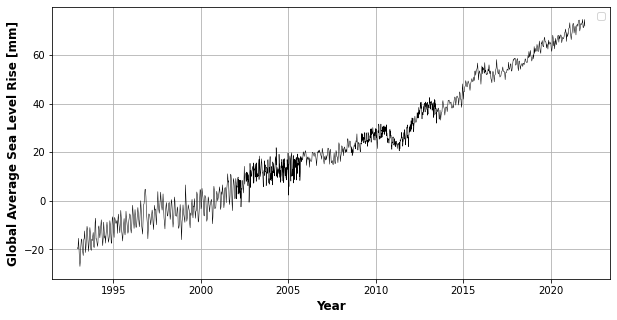

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sea.plot("year", "max_level", ax=ax, color='black', lw=0.5)
ax.grid()
ax.set_ylabel('Global Average Sea Level Rise [mm]', weight = 'bold', fontsize=12)
ax.set_xlabel('Year', weight = 'bold', fontsize=12)
ax.legend("")

**Figure 1** Plots the global average sea level rise [mm] as a function of time. The data is plotted in black. Overall, there is a clear linear trend in place where as the years go by -- sea level rise is correspondingly increasing. 

Let's compare this global value to values at smaller spatial scales.

<b>In the same way that you loaded the global data with seasonal effects removed, load in data for the Pacific Ocean, the Atlantic Ocean, the Indian Ocean, and the Southern Ocean (each in its own DataFrame), and for each of these new DataFrames, create a `"max_level"` column that is the max sea level .</b>

In [ ]:
fname = "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_pac_free_txj1j2_90.csv"
pacific = pd.read_csv(fname, skiprows=5)
pacific['max_level'] = pacific[['TOPEX/Poseidon', 'Jason-1', 'Jason-2', 'Jason-3']].max(axis=1)
pacific.head(2)

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level
0,1992.9614,-13.07,NaN,NaN,NaN,-13.07
1,1992.9864,-24.34,NaN,NaN,NaN,-24.34


In [ ]:
fname = "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_atl_free_txj1j2_90.csv"
atlantic = pd.read_csv(fname, skiprows=5)
atlantic['max_level'] = atlantic[['TOPEX/Poseidon', 'Jason-1', 'Jason-2', 'Jason-3']].max(axis=1)
atlantic.head(2)

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level
0,1992.9615,-24.92,NaN,NaN,NaN,-24.92
1,1992.9870,-17.25,NaN,NaN,NaN,-17.25


In [ ]:
fname = "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_ind_free_txj1j2_90.csv"
indian = pd.read_csv(fname, skiprows=5)
indian['max_level'] = indian[['TOPEX/Poseidon', 'Jason-1', 'Jason-2', 'Jason-3']].max(axis=1)
indian.head(2)

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level
0,1992.9614,-28.56,NaN,NaN,NaN,-28.56
1,1992.9865,-12.37,NaN,NaN,NaN,-12.37


In [ ]:
fname = "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_so_keep_all.csv"
southern = pd.read_csv(fname, skiprows=5)
southern['max_level'] = southern[['TOPEX/Poseidon', 'Jason-1', 'Jason-2', 'Jason-3']].max(axis=1)
southern.head(2)

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,max_level
0,1992.9612,-24.49,NaN,NaN,NaN,-24.49
1,1992.9865,-16.79,NaN,NaN,NaN,-16.79


<b>Plot all of the max sea level data in a different color on the same plot using linewidth 0.2.  Plot the global line last in black using a linewidth of 0.5.  Add a legend to the plot by using the `label` keyword inside the `ax.plot()` function and the `ax.legend()` function.</b>

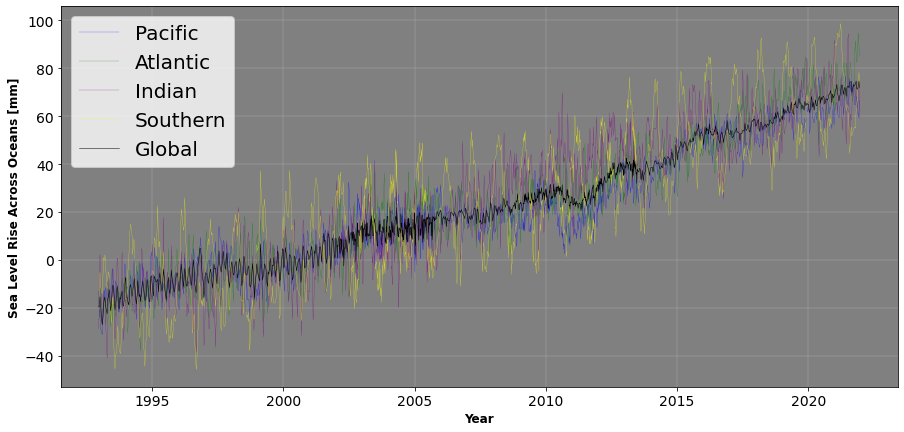

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
pacific.plot("year", "max_level", ax=ax, label="Pacific", lw=0.2, color='blue', fontsize=14)
atlantic.plot("year", "max_level", ax=ax, label="Atlantic", lw=0.2, color='green')
indian.plot("year", "max_level", ax=ax, label="Indian", lw=0.2, color='purple')
southern.plot("year", "max_level", ax=ax, label="Southern", lw=0.2, color='yellow')
sea.plot("year", "max_level", ax=ax, label="Global", lw=0.5, color="black")
ax.grid(lw=.4)
ax.set_xlabel("Year", weight='bold', fontsize=12)
ax.set_ylabel("Sea Level Rise Across Oceans [mm]", weight='bold', fontsize=12)
ax.legend(prop={'size': 20})
ax.set_facecolor("grey")


<b>Describe the plot above.  What can you conclude about the variability of sea level rise across the globe?</b>

**Figure 2**: plots the sea level rise [mm] for the pacific ocean in blue; the atlantic ocean in green; the indian ocean in purple; the southern ocean in yellow; and the overall average global sea level rise in black as a function of Year. Across the worlds oceans, we see a clear linear trend for all oceans whereas the years pass -- so to does sea level increase. There is a good bit of variability however across the world's oceans in terms of sea level rise in [mm] over time. However, the average global sea level rise plotted in black shows us that once the average is taken -- the variability significantly decreases and the series becomes much more smoothed out from the ebbs and flows of the various individual ocean sea level rises [mm] plotted in figure 2. Nonetheless, even though we do see variability in figure 2 -- there is a clear linear trend for all the series plotted. What is interesting to note however about figure 2, is that the Southern ocean plotted in yellow relative to all other oceans appears to have the most variability in its series with the greatest spikes at points in time -- suggesting to us that the southern ocean where the antarctic is -- is being the ocean feeling the most immediate impacts of global warming and subsequent sea level rise taking place which makes sense given what we know about the melting ice sheets of the Antarctic region. 

This data covers roughly 30 years of sea level changes, but there are data that go back further that are available from CSIRO (Commonwealth Scientific and Industrial Research Organization).  Descriptions of aggregated historical data from CSIRO can be found [here](https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/) and in the associated links.  The data we'll be using is available as a [CSV](https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv) -- but please see the documentation and caveats associated with it in the README at the bottom of [this](https://datahub.io/core/sea-level-rise) page.

<b>Read in the CSIRO data from the link above labeled CSV into a DataFrame called `csiro` and take the <u>minimum</u> of the `"CSIRO Adjusted Sea Level"` and `"NOAA Adjusted Sea Level"` colmuns for each year and add those values to the `csiro` DataFrame as a column called `"min_level"`.</b>

In [ ]:
fname = 'https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv'
csiro = pd.read_csv(fname)
csiro['min_level'] = csiro[['CSIRO Adjusted Sea Level', 'NOAA Adjusted Sea Level']].min(axis=1)
csiro

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-0.232283
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,0.590551
...,...,...,...,...,...,...
130,2010-03-15,8.901575,8.618110,9.185039,8.122973,8.122973
131,2011-03-15,8.964567,8.661417,9.267717,8.053065,8.053065
132,2012-03-15,9.326772,8.992126,9.661417,8.457058,8.457058
133,2013-03-15,8.980315,8.622047,9.338583,8.546648,8.546648


Note that the year 2000 is in the 120th element of the CSIRO data and that the data is in inches, not millimeters.

<b>To get it in the same units as the NOAA data above, subtract off the value of `min_level` at the 120th element from `min_level`, then multiply the result by `2.54 * 10` (the inches to millimeters conversion), and put the result into a new column called `"adjusted_min_level"`.</b>

In [ ]:
csiro['adjusted_min_level'] = (csiro['min_level'] - csiro['min_level'].iloc[120]) * (2.54 * 10)
csiro


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000,-175.782783
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472,-170.182783
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945,-186.982783
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.682783
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,0.590551,-160.782783
...,...,...,...,...,...,...,...
130,2010-03-15,8.901575,8.618110,9.185039,8.122973,8.122973,30.540720
131,2011-03-15,8.964567,8.661417,9.267717,8.053065,8.053065,28.765068
132,2012-03-15,9.326772,8.992126,9.661417,8.457058,8.457058,39.026481
133,2013-03-15,8.980315,8.622047,9.338583,8.546648,8.546648,41.302082


Run the cell below to create a column called "year_int" that is the CSIRO year so that we don't have to worry about the months and dates from now on.

In [ ]:
csiro["year_int"] = [int(i[:4]) for i in csiro["Year"]]
csiro

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level,min_level,adjusted_min_level,year_int
0,1880-03-15,0.000000,-0.952756,0.952756,NaN,0.000000,-175.782783,1880
1,1881-03-15,0.220472,-0.732283,1.173228,NaN,0.220472,-170.182783,1881
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN,-0.440945,-186.982783,1882
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN,-0.232283,-181.682783,1883
4,1884-03-15,0.590551,-0.283465,1.464567,NaN,0.590551,-160.782783,1884
...,...,...,...,...,...,...,...,...
130,2010-03-15,8.901575,8.618110,9.185039,8.122973,8.122973,30.540720,2010
131,2011-03-15,8.964567,8.661417,9.267717,8.053065,8.053065,28.765068,2011
132,2012-03-15,9.326772,8.992126,9.661417,8.457058,8.457058,39.026481,2012
133,2013-03-15,8.980315,8.622047,9.338583,8.546648,8.546648,41.302082,2013


<b>Now plot all of the data (all NOAA and CSIRO) on the same graph.</b>

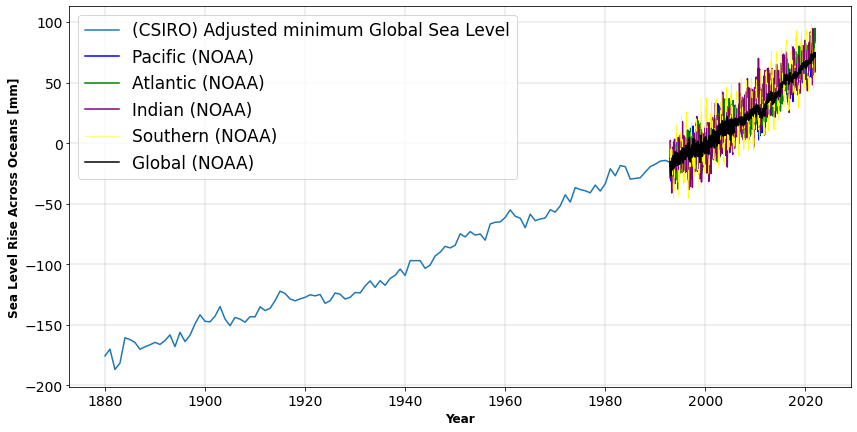

In [ ]:
fig, ax = plt.subplots(figsize=(14,7))
csiro.plot("year_int", "adjusted_min_level", ax=ax, label='(CSIRO) Adjusted minimum Global Sea Level')
pacific.plot("year", "max_level", ax=ax, label="Pacific (NOAA)", color='blue', fontsize=14)
atlantic.plot("year", "max_level", ax=ax, label="Atlantic (NOAA)", color='green')
indian.plot("year", "max_level", ax=ax, label="Indian (NOAA)", color='purple')
southern.plot("year", "max_level", ax=ax, label="Southern (NOAA)", color='yellow', lw=0.5)
sea.plot("year", "max_level", ax=ax, label="Global (NOAA)", color="black")
ax.grid(lw=.4)
ax.set_xlabel("Year", weight='bold', fontsize=12)
ax.set_ylabel("Sea Level Rise Across Oceans [mm]", weight='bold', fontsize=12)
ax.legend(prop={'size': 17})



**Figure 3**: plots the sea level rise [mm] across the worlds oceans including ocean specific sea level rises and global average sea level rises. The various global averages on the graph are shown in light blue for CSIRO data which shows the absolute average sea level rise in [mm] along with the NOAA data for global average sea levle rise which is plotted in black which has a shorter temporality to it. Overall, we can see clearly from 1880 onwards there is a clear linear rise in global average sea level rise [mm] as a function of time.

### **PART 4 - Standardize the data**

You should now have two DataFrames, one holding the <u>global</u> NOAA data (we'll work with only the global data from now on) with columns called `"year"` and `"max_level"`, and one holding the CSIRO data with columns called `"year_int"` and `"adjusted_min_level"`.  As we did in class, we have to standardize this data for the SGD-based linear regression.

<b>Get the mean and standard deviation of `"year"` and `"max_level"` from the NOAA dataframe and the mean and standard deviation of the `"year_int"` and `"adjusted_min_level"` from the CSIRO dataframe.</b>

In [ ]:
## creating the 2 dataframes for only the features that we are interested in
sea = sea[['year', 'max_level']]
print(sea.head(2))
csiro = csiro[['year_int', 'adjusted_min_level']]
print(csiro.head(2))

        year  max_level
0  1992.9614     -19.32
1  1992.9865     -19.74
   year_int  adjusted_min_level
0      1880         -175.782783
1      1881         -170.182783


In [ ]:
# creating arrays out of the dataframes and extracting them into their own variables 
NOAA_year = sea['year'].values
NOAA_searise = sea['max_level'].values
csiro_year = csiro['year_int'].values
csiro_searise = csiro['adjusted_min_level'].values

print("The means for our 2 dataframes and their features are:")
print("\n")
print("For NOAA year and sea level rise")
print(NOAA_year.mean())
print(NOAA_searise.mean())
print("\n")
print("For csiro year and sea level rise")
print(csiro_year.mean())
print(csiro_searise.mean())
print("\n")
print("The standard deviations for our 2 dataframes and their values are:")
print("\n")
print("For NOAA year and sea level rise")
print(NOAA_year.std())
print(NOAA_searise.std())
print("\n")
print("For csiro year and sea level rise")
print(csiro_year.std())
print(csiro_searise.std())


The means for our 2 dataframes and their features are:


For NOAA year and sea level rise
2007.976353081664
23.60557781201849


For csiro year and sea level rise
1947.0
-83.3455077780252


The standard deviations for our 2 dataframes and their values are:


For NOAA year and sea level rise
7.633439885750236
23.500152014337058


For csiro year and sea level rise
38.97007398846795
61.434390832880126


<b>Create columns in your NOAA dataframe called `"year_st"` and `"max_level_st"` that are standardized versions of `"year"` and `"max_level"`.</b>

In [ ]:
sea['year_st'] = (sea['year'] - sea['year'].mean()) / sea['year'].std()
sea['max_level_st'] = (sea['max_level'] - sea['max_level'].mean()) / sea['max_level'].std()
sea

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,max_level,year_st,max_level_st
0,1992.9614,-19.32,-1.966239,-1.825905
1,1992.9865,-19.74,-1.962952,-1.843770
2,1993.0123,-15.40,-1.959574,-1.659162
3,1993.0407,-19.20,-1.955855,-1.820800
4,1993.0660,-23.73,-1.952542,-2.013491
...,...,...,...,...
1293,2021.8450,71.48,1.816128,2.036411
1294,2021.8721,71.32,1.819677,2.029606
1295,2021.8992,72.41,1.823226,2.075970
1296,2021.9264,74.69,1.826787,2.172954


In [ ]:
print(sea['year_st'].mean())
print(sea['year_st'].std())
print(sea['max_level_st'].mean())
print(sea['max_level_st'].std())

-1.6613332863143168e-13
1.0000000000000007
4.30403872104298e-16
0.9999999999999994


 <b>Create columns in your CSIRO dataframe called `"year_int_st"` and `"adjusted_min_level_st"` that are standardized versions of `"year_int"` and `"adjusted_min_level"`.</b>

In [ ]:
csiro['year_int_st'] = (csiro['year_int'] - csiro['year_int'].mean()) / csiro['year_int'].std()
csiro['adjusted_min_level_st'] = (csiro['adjusted_min_level'] - csiro['adjusted_min_level'].mean()) / csiro['adjusted_min_level'].std()
csiro

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year_int,adjusted_min_level,year_int_st,adjusted_min_level_st
0,1880,-175.782783,-1.712888,-1.499067
1,1881,-170.182783,-1.687323,-1.408251
2,1882,-186.982783,-1.661757,-1.680699
3,1883,-181.682783,-1.636192,-1.594748
4,1884,-160.782783,-1.610626,-1.255810
...,...,...,...,...
130,2010,30.540720,1.610626,1.846908
131,2011,28.765068,1.636192,1.818112
132,2012,39.026481,1.661757,1.984522
133,2013,41.302082,1.687323,2.021426


In [ ]:
print(csiro['year_int_st'].mean())
print(csiro['year_int_st'].std())
print(csiro['adjusted_min_level_st'].mean())
print(csiro['adjusted_min_level_st'].std())

-2.7961172472040977e-17
1.0
1.1250259982868252e-15
0.9999999999999999


<b>Make a plot of the standardized NOAA global data.</b>

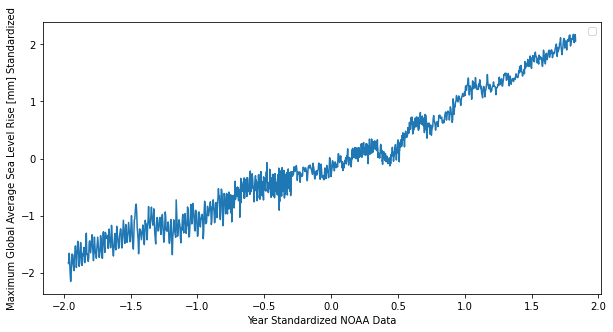

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sea.plot('year_st', 'max_level_st', ax=ax)
ax.set_xlabel('Year Standardized NOAA Data')
ax.set_ylabel("Maximum Global Average Sea Level Rise [mm] Standardized")
ax.legend("")

**Figure 4** plots the standardized NOAA global average sea level rise data as a function of year. A clear linear relationship is present.

<b>Make a plot of the standardized CSIRO data.</b>

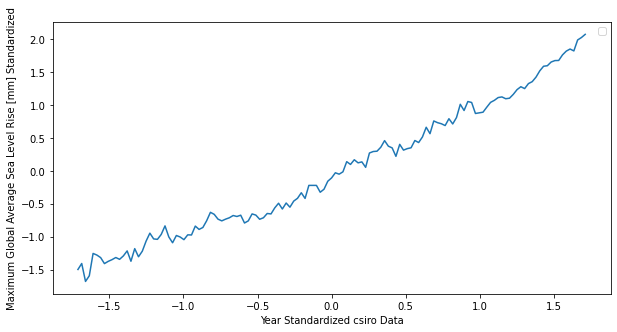

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
csiro.plot('year_int_st', 'adjusted_min_level_st', ax=ax)
ax.set_xlabel('Year Standardized csiro Data')
ax.set_ylabel("Maximum Global Average Sea Level Rise [mm] Standardized")
ax.legend("")

**Figure 5** Plots the standardized CSIRO global mininum average sea level rise data as a function of year. A clear linear relationship is present. 

### **PART 5 - Fit and compare models between NOAA and CSIRO**

<b>Import `SGDRegressor` from `sklearn` and run a regression model using the default parameters.</b>

In [ ]:
### Making Arrays for the unstandardized data and standardized NOAA DATA

year = sea['year'].values.reshape(-1, 1)
max_level = sea['max_level'].values
year_st = sea['year_st'].values.reshape(-1, 1)
max_level_st = sea['max_level_st'].values

### Making Arrays for the unstandardized data and  standardized CSIRO DATA
year_int = csiro['year_int'].values.reshape(-1, 1)
adjusted_min_level = csiro['adjusted_min_level'].values
year_int_st = csiro['year_int_st'].values.reshape(-1, 1)
adjusted_min_level_st = csiro['adjusted_min_level_st'].values





In [ ]:
#FOR NOAA DATA runnig the regression

# -- import scikit-learn's Stochastic Gradient Descent regressor
from sklearn.linear_model import SGDRegressor

# -- redefine the the SGD regression model to use with the standardized data
lm_st = SGDRegressor()

# -- fit the standardized data
fitNOAA = lm_st.fit(year_st, max_level_st)

# -- predict the standardized data
model_st = fitNOAA.predict(year_st)


# -- plot it
#fig, ax = plt.subplots()
#ax.plot(year_st, max_level_st, "o", label="data")
#ax.plot(year_st, model_st, label="model")
#ax.set_xlabel("year [standardized]")
#ax.set_ylabel("Average Global Sea Level Rise [standardized]")
#ax.legend()
#fig.show()

<b>"Unstandardize" the model as we did in class by multiplying by the standard deviation and adding the average of the unstandardized data set.</b>

In [ ]:
# -- "un-standardize" the model
modelNOAA = model_st * max_level.std() + max_level.mean()



<b>Assume that the error in each measurement is 2.5 mm, calculate the $\chi^2$ per degree of freedom for this model.</b>

In [ ]:
# -- calculate chi^2
err = 2.5
chisq = ((max_level - modelNOAA)**2 / err**2).sum()
print("chi^2 = {0}".format(chisq))

# -- calculate chi^2 per dof
nparams = 2
chisq_dof = chisq / (len(max_level) - nparams)
print("chi^2 per degree of freedom = {0}".format(chisq_dof))
print("We have a chi^2 degree of freedom of roughly 3.49 which is relatively close to 1 suggesting to us that our model did a good job at fitting the data")

chi^2 = 4530.047754414726
chi^2 per degree of freedom = 3.4954072179125975
We have a chi^2 degree of freedom of roughly 3.49 which is relatively close to 1 suggesting to us that our model did a good job at fitting the data


**Calculating R^2**

In [ ]:
# -- calculate R^2
r2 = 1.0 - (max_level - modelNOAA).var() / max_level.var()
r2

0.9605147100716541

<b>Overplot this model on the global data.</b>

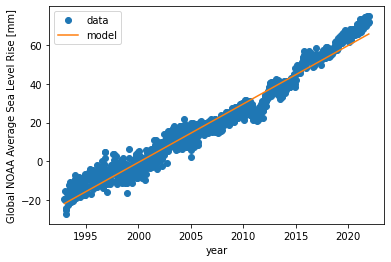

In [ ]:

# -- plot it
fig, ax = plt.subplots()
ax.plot(year, max_level, "o", label="data")
ax.plot(year, modelNOAA, label="model")
ax.set_xlabel("year")
ax.set_ylabel("Global NOAA Average Sea Level Rise [mm]")
ax.legend()
fig.show()

**Figure 6** above plots the raw data for our global minimum sea level rise (average) as a function of year in blue while our predicted values are plotted in orange to showcase our linear fit. Overall, the model appears to fit the data relatively good. 

<b>Fit an SGDRegressor model to the standardized CSIRO data, "un-standardize" the model, and calculate the $\chi^2$ per degree of freedom for this model assuming the errors are 3.9 mm.</b>

In [ ]:
#FOR CSIRO DATA runnig the regression

# -- import scikit-learn's Stochastic Gradient Descent regressor
from sklearn.linear_model import SGDRegressor

# -- redefine the the SGD regression model to use with the standardized data
lm_st_CSIRO = SGDRegressor()

# -- fit the standardized data
lm_st_CSIRO.fit(year_int_st, adjusted_min_level_st)

# -- predict the standardized data
model_st_CSIRO = lm_st_CSIRO.predict(year_int_st)


# -- "un-standardize" the model
modelCSIRO = model_st_CSIRO * adjusted_min_level.std() + adjusted_min_level.mean()








**Calculating Chi^2**

In [ ]:
# -- calculate chi^2
err = 3.9
chisq = ((adjusted_min_level - modelCSIRO)**2 / err**2).sum()
print("chi^2 = {0}".format(chisq))

# -- calculate chi^2 per dof
nparams = 2
chisq_dof = chisq / (len(adjusted_min_level) - nparams)
print("chi^2 per degree of freedom = {0}".format(chisq_dof))
print("We have a chi^2 degree of freedom of roughly 5.6 which is relatively close but not super clsoe to 1 suggesting to us that our model did a decent job at fitting the data")

chi^2 = 745.9847223795205
chi^2 per degree of freedom = 5.608907687064064
We have a chi^2 degree of freedom of roughly 5.6 which is relatively close but not super clsoe to 1 suggesting to us that our model did a decent job at fitting the data


**Calculating R^2**



In [ ]:
# -- calculate R^2
r2 = 1.0 - (adjusted_min_level - modelCSIRO).var() / adjusted_min_level.var()
r2

0.9777314824622063

<b>Overplot this model on the CSIRO data.</b>

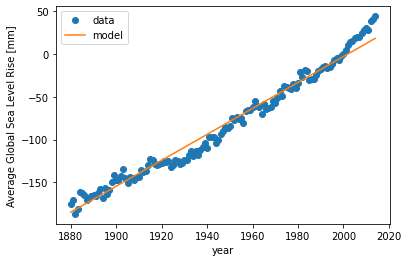

In [ ]:
# -- plot it
fig, ax = plt.subplots()
ax.plot(year_int, adjusted_min_level, "o", label="data")
ax.plot(year_int, modelCSIRO, label="model")
ax.set_xlabel("year")
ax.set_ylabel("Average Global Sea Level Rise [mm]")
ax.legend()
fig.show()

**Figure 7** plots the CSIRO data average global minimum sea level rise in blue as a function of year. The linear fit is overlaid in orange. Overall, the model appears to fit the data relatively good -- and there is a clear linear relationship occurring. 

 **Which data is better fit by a linear model?  Why do you think that is?**




Overall -- figure 6 plotted the NOAA data while figure 7 plotted the CSIRO data. The time period under study for the CSIRO data was about 4 times as large as that of the NOAA data. The overall R^2 for the CSIRO data was slightly higher suggesting that time explained more of variation in CSIRO sea level rise data than it did in NOAA sea level rise data. A good reason for this is the fact that the CSIRO data had a larger time variation and was thus more accurately able to explain the variation in the outcome because it had more temporality in terms of years to guide it -- although both datasets had a lot of n. However, the chi^2 degrees of freedom was slighly smaller and closer to 1 for the NOAA data in figure 6 relative to the CSIRO data in figure 7 -- suggesting that the NOAA data may be perhaps betetr fit by a linear model. Ovearll -- from the metrics I've provided for both models -- it is hard to definitevly say at the end of the day that one model fit is better than the other. Although choosing for a choice for a decision maker -- I would have to derive my estimates from the CSIRO linear model due to the larger temporal variation it has thereby allowing us to make greater inferences and predictions with confidence. 



**What are the rates of sea level rise for every year that goes by?**

For NOAA data:

In [ ]:
# rise 
#getting the 2 values at the bottom next to eachother of sea level rise and subtracting them

#print(modelNOAA[0:2])
riseNOAA = -21.66220216 - -21.58648608
print("The rise for NOAA data is {0}".format(riseNOAA))

#run
# getting the 2 values of year and subtracting them from eachotehr 
#print(sea['year'][0:2])
runNOAA = 1992.9614 - 1992.9865
print("the run for NOAA data is {0}".format(runNOAA))

print("The rate of change in sea level for each year that goes by for the NOAA data is {0:.2f} mm/yr".format(riseNOAA/runNOAA))


The rise for NOAA data is -0.07571607999999941
the run for NOAA data is -0.025100000000065847
The rate of change in sea level for each year that goes by for the NOAA data is 3.02 mm/yr


For CSIRO data:


In [ ]:
# rise 
#getting the 2 values at the bottom next to eachother of sea level rise and subtracting them

#print(modelCSIRO[0:2])
riseCSIRO = -185.06140095 - -183.54268174
riseCSIRO

#run
# getting the 2 values of year and subtracting them from eachotehr 
#print(csiro['year_int'][0:2])
runCSIRO = 1880 - 1881
runCSIRO

print("The rate of change in sea level for each year that goes by for the CSIRO data is {0:.2f} mm/yr".format(riseCSIRO/runCSIRO))


The rate of change in sea level for each year that goes by for the CSIRO data is 1.52 mm/yr


**What are the predictions for each model for sea level in 2100?**

For the NOAA Data:

In [ ]:
# standardizing the NOAA data for the predicton of year 2100 -- standardizing 2100 as 
#derived from subtracting the mean and dividing std of the series for year

year2100standardized = (2100 - 2007.976353081664) / 7.633439885750236
print("The standardized value for the year 2100 is {0}:".format(year2100standardized))

# reofrmatting the data to feed it into the predict function feed in the standardized year 2100
yearNOAApredict = np.array(12.055331317945088)
yearNOAApredict = yearNOAApredict.reshape(-1, 1)

print("the prediction for year 2100 in standardized form is {0} mm/yr".format(fitNOAA.predict(yearNOAApredict)))
print("the prediction for average sea level rise for the NOAA data for the year 2100 in standard normal form is {0} mm/yr".format(11.713583 * max_level.std() + max_level.mean()))


The standardized value for the year 2100 is 12.055331317945088:
the prediction for year 2100 in standardized form is [11.79556746] mm/yr
the prediction for average sea level rise for the NOAA data for the year 2100 in standard normal form is 298.8765589445728 mm/yr


For CSIRO Data

In [ ]:
# standardizing the CSIRO data for the predicton of year 2100 -- standardizing 2100 as 
#derived from subtracting the mean and dividing std of the series for year

year2100standardizedCSIRO = (2100 - 1947.0) / 38.97007398846795    
print("The standardized value for the year 2100 is {0}:".format(year2100standardizedCSIRO))

# reofrmatting the data to feed it into the predict function feed in the standardized year 2100
yearCSIROpredict = np.array(3.9260895436143093)
yearCSIROpredict = yearCSIROpredict.reshape(-1, 1)

print("the prediction for year 2100 in standardized form is {0} mm/yr".format(lm_st_CSIRO.predict(yearCSIROpredict)))
print("the prediction for average sea level rise for the CSIRO data for the year 2100 in standard normal form is {0} mm/yr".format(3.79716122 * adjusted_min_level.std() + adjusted_min_level.mean()))


The standardized value for the year 2100 is 3.9260895436143093:
the prediction for year 2100 in standardized form is [3.79285764] mm/yr
the prediction for average sea level rise for the CSIRO data for the year 2100 in standard normal form is 149.93077866691073 mm/yr


**What approximations have we made that may or may not be accurate?**

The approximations that we have made that have been accurate is determining the linear fit from the CSIRO data including the rate of change which is nearly 50% smaller than the rate of change for the NOAA data for sea level rise [mm/yr] whereas the rate of change for the NOAA data which has a temporal variation of only 30 years under study has a much greater rate of change. I claim that the rate of change and estimating this approximation for the CSIRO data is more accurate and reliable in its estimates due to the larger temporal variation understudy which has allowed the model to greater learn the parameters and make a more accurate prediction of roughly 1.52 mm/yr sea level rise over time (although both datasets have a farily high n). On the other hand, the rate of change for the NOAA data for sea level rise is roughly 3.02 mm/yr and this approximation/estimate may not be entirely accurate given that the model is learning the parameters from such a short period (30 years) understudy although still a lot of n. With that said -- our predictions for average sea level rise mm/yr is drastically different when forecasting out to year 2100. For instance, the NOAA data predicts sea level rise of roughly 298 mm/yr while the CSIRO data predicts sea level rise of roughly 149 mm/yr -- which again makes intuitive sense given that we know the rate of change for CSIRO is half that for NOAA -- so it makes intutive sense that the average sea level rise mm/yr for CSIRO is also nearly half that of NOAA data. Thus, both of these approximations are accurate in terms of sea-level rise data with what the model learned from its parameters -- but overall, I argue that the CSIRO data is a better and more accurate measure given that it is pulling from a larger time period under study. This is also a good thing for the climate and sea level rise as it suggests sea level rise when taking in data that spans back hundreds of years -- may not be rising all that rapidly -- still quick -- but not as a rapid of a rate when we only have the 30 most recent years under study. 

### **PART 6 - EXTRA CREDIT**

<b>Perform a linear regression on each 30 year interval in the CSIRO data starting from 1880 (i.e, 1880-1910, 1881-1911, 1882-1912, etc).  Make a plot of the slope that is fit for each interval as a function of time.  What are the implications of this plot?</b>


TEXT FOR ANSWER HERE